# DotArray Object for a Single Quantum Dot Array

In [11]:
import os
from pathlib import Path
path = Path(os.getcwd())

# update base working directory to QuDiPy
if path.stem != 'QuDiPy':
    base_dir = path.parents[1]
    os.chdir(base_dir)
else:
    base_dir = path

## 0. Import relevant Python and QuDiPy modules

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

from qudipy.system import DotArray

## 1. Generate Dots object instance

Refer to [2QD DotArray Usage Tutorial](./Dot%20Array%20Class%20Usage%202%20Dots.ipynb) for more about creating dots objects.

In [13]:
nav_dir = os.path.join('QuDiPy data', 'resources')
processed_dir = os.path.join(base_dir, nav_dir,
                            'processed','1QD_processed')
nextnano_dir = os.path.join(base_dir, nav_dir,
                                    'nextnano','1QD') 
                
n_dots = 1      # anticipated number of dots

Define a voltage control sweep for a single plunger electrode.

In [14]:
pts = [7]
ctrl_vals = [np.linspace(0.1, 0.7, pts[0])]

# provide a file prefix for labeled interpolation objects
file_prefix = '1QD_data'

### 1.2 Create object instance 

Here we are loading only the 2D electrostatic potentials to use potential interpolation
objects. These will be used to give an example for counting the number of dots is
performed. 

In [15]:
dots = DotArray(n_dots, ctrl_ranges=ctrl_vals, save=True, calc=['spin'])
dots.numeric(processed_dir, nextnano_dir, file_prefix)

Loading pre-calculated spin interpolators from
/home/zach/Documents/github/QuDiPy/QuDiPy data/resources/processed/1QD_processed/1QD_data_spin_data_size_[7]_from_[0.1]_to_[0.7].pkl


If desired rename the control variable names.

In [16]:
dots.ctrl_names = ['$V_1$']

We can reference the potential interpolators as follows.

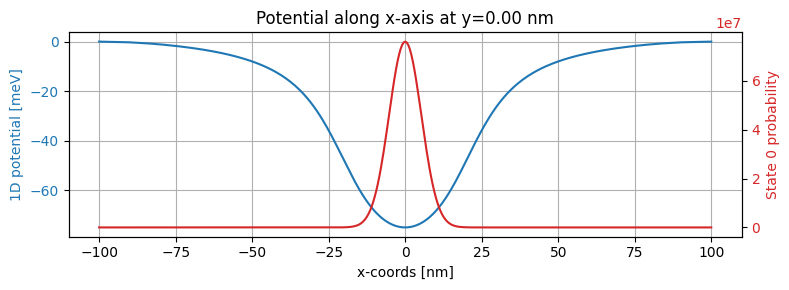

In [17]:
ctrl_vector = [0.3]
dots.potential.plot(ctrl_vector, pot_unit='meV', rel_amp=True, plot_type='1D', y_slice=0, show_wf=True)

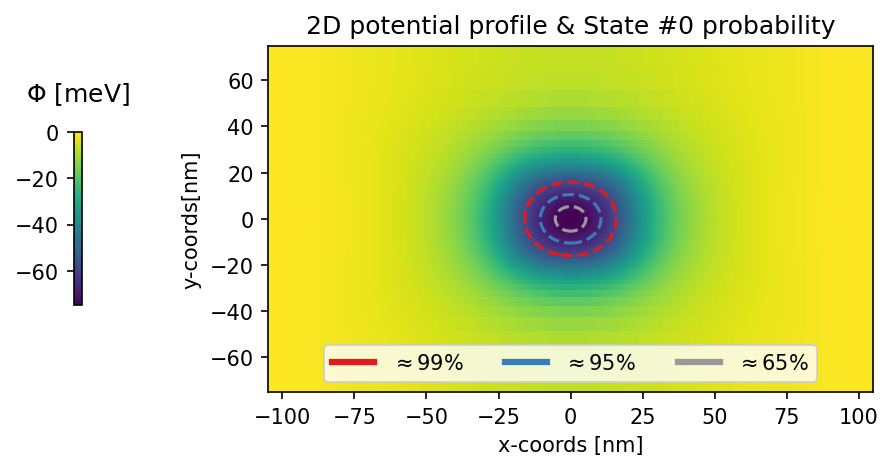

In [18]:
dots.potential.plot(ctrl_vector, pot_unit='meV', rel_amp=True, show_wf=True)

## 1.3 Evaluate effective parameters

For a specific control voltage configuration, several effective parameters can be evaluated. In the
 following example the $g$-factor deviation is determined for a single dot.

The $g$-factor deviation can be evaluated either directly (`exact=True` keyword), or using a pre-calculated interpolator 
(`exact=False` keyword). The results are compared below.

In [19]:
# higher voltage on the 2nd dot gives higher g-factor deviation
voltage_config = [0.2]

print('Exact values:\t',    dots.g_factors(voltage_config, exact=True))
print('Interpolated:\t',    dots.g_factors(voltage_config, exact=False))

g_factor evaluation: control vector=[0.2]: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
Exact values:	 [1.91584096e-05]
Interpolated:	 [1.91584096e-05]


g-factor deviation for multiple voltage values.

g_factor evaluation: control vector=[0.7]: 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]                
NOTE: No static votlage controls to add to figure.
NOTE: No static votlage controls to add to figure.


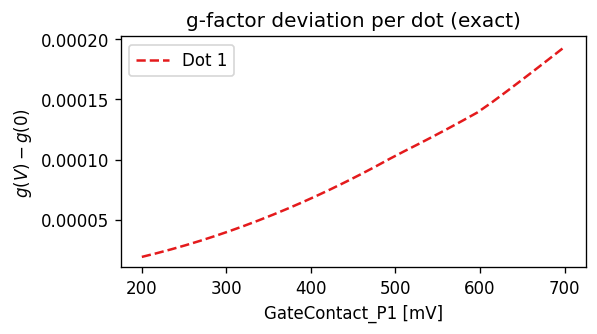

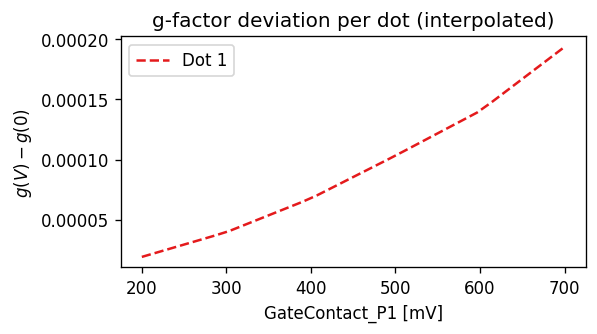

In [20]:
v1_vals = np.linspace(0.2, 0.7, 30)
v1_sweep =[[v] for v in v1_vals]
    
dots.plot(v1_sweep, param='gfactor', exact=True)
dots.plot(v1_sweep, param='gfactor', exact=False)